In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [2]:
#Loading Dataset fake.csv
fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')

In [3]:
fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
#loading dataset True.csv
real = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')

In [5]:
real.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [6]:
#Assign the label 'fake' to all entries in the fake dataset and 'real' to all entries in the real dataset
fake['label'] = 'fake'  
real['label'] = 'real'

In [7]:
fake.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",fake


In [8]:
real.head(10)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",real
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",real
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",real
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",real
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",real


In [9]:
# Concatenate the fake and real datasets into a single DataFrame, resetting the index
combine = pd.concat([fake,real],ignore_index=True)

In [10]:
# Shuffle the combined dataset randomly and reset the index
combine = combine.sample(frac =1).reset_index(drop = True)

In [11]:
# Save the combined dataset to a CSV file without including the index
combine.to_csv("combine_dataset.cvs",index=False) 

In [12]:
# Load the combined dataset from the CSV file
df = pd.read_csv('/kaggle/working/combine_dataset.cvs')

In [13]:
df.head(10)

,title,text,subject,date,label
0,Ted Cruz’s Campaign Manager BURNS Chris Chris...,If Chris Christie is looking for his testicles...,News,"July 21, 2016",fake
1,"Bill Clinton, Tim Kaine cancel Iowa event afte...",WASHINGTON (Reuters) - Democratic presidential...,politicsNews,"November 2, 2016",real
2,NBC BUSTED MAKING UP EMBARRASSING “GOTCHA” Tru...,"In NBC s attempt to discredit Trump, they ve s...",left-news,"Aug 11, 2016",fake
3,Super Bowl QB Peyton Manning Bankrolling This...,When you sit down to watch the Super Bowl cont...,News,"February 6, 2016",fake
4,Darren Wilson Just Admitted He LIED About Mic...,"If you ask any conservative, Ferguson police o...",News,"March 15, 2017",fake
5,President Obama Mocks Conservatives That Clai...,President Barack Obama has addressed the ridic...,News,"February 17, 2016",fake
6,Thai junta tells Japan investors $45-billion d...,BANGKOK (Reuters) - A $45-billion plan to rede...,worldnews,"September 11, 2017",real
7,WATCH What Happens When Random People Are Aske...,Hilarious conservative media analyst and Youtu...,left-news,"May 4, 2017",fake
8,FBI expects Clinton documents will not be rele...,WASHINGTON (Reuters) - The FBI said Tuesday it...,politicsNews,"August 16, 2016",real
9,"Bill Clinton LOSES IT, Goes Off On Heckler In...",Former President Bill Clinton has been known t...,News,"November 1, 2016",fake


In [14]:
df['label'].value_counts()

label
fake    23481
real    21417
Name: count, dtype: int64

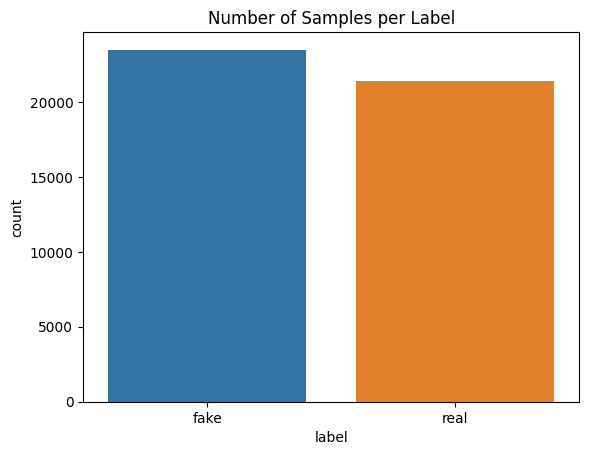

In [15]:
sns.countplot(df,x='label')
plt.title("Number of Samples per Label")
plt.show()

In [16]:
# Display the number of missing values for each column in the DataFrame
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [17]:
df['title'][0]

' Ted Cruz’s Campaign Manager BURNS Chris Christie: He Gave His Balls To Trump (AUDIO)'

In [18]:
#transformation the 'label' column into numerical values by using LabelEncoder
encoding = LabelEncoder()
df['label'] = encoding.fit_transform(df['label'])

In [19]:
df.head(10)

,title,text,subject,date,label
0,Ted Cruz’s Campaign Manager BURNS Chris Chris...,If Chris Christie is looking for his testicles...,News,"July 21, 2016",0
1,"Bill Clinton, Tim Kaine cancel Iowa event afte...",WASHINGTON (Reuters) - Democratic presidential...,politicsNews,"November 2, 2016",1
2,NBC BUSTED MAKING UP EMBARRASSING “GOTCHA” Tru...,"In NBC s attempt to discredit Trump, they ve s...",left-news,"Aug 11, 2016",0
3,Super Bowl QB Peyton Manning Bankrolling This...,When you sit down to watch the Super Bowl cont...,News,"February 6, 2016",0
4,Darren Wilson Just Admitted He LIED About Mic...,"If you ask any conservative, Ferguson police o...",News,"March 15, 2017",0
5,President Obama Mocks Conservatives That Clai...,President Barack Obama has addressed the ridic...,News,"February 17, 2016",0
6,Thai junta tells Japan investors $45-billion d...,BANGKOK (Reuters) - A $45-billion plan to rede...,worldnews,"September 11, 2017",1
7,WATCH What Happens When Random People Are Aske...,Hilarious conservative media analyst and Youtu...,left-news,"May 4, 2017",0
8,FBI expects Clinton documents will not be rele...,WASHINGTON (Reuters) - The FBI said Tuesday it...,politicsNews,"August 16, 2016",1
9,"Bill Clinton LOSES IT, Goes Off On Heckler In...",Former President Bill Clinton has been known t...,News,"November 1, 2016",0


In [20]:
# Display the count of each unique value in the 'label' column
df['label'].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

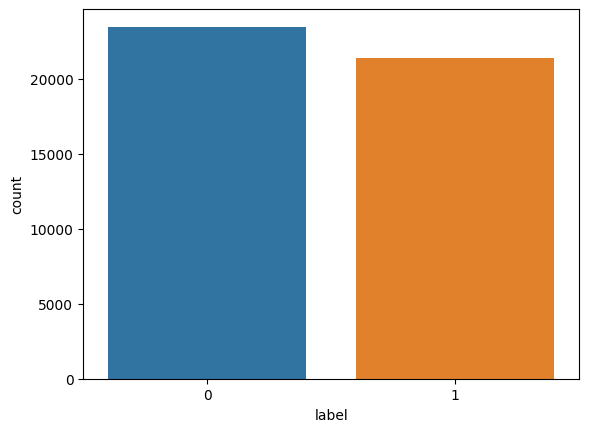

In [21]:
# Create a bar plot of the label counts
sns.countplot(df,x='label')

In [22]:
# Drop the 'subject' and 'date' columns from the DataFrame
df.drop(columns= ['subject','date'],inplace=True,axis=1)

In [23]:
df.columns #number of columns

Index(['title', 'text', 'label'], dtype='object')

In [24]:
# Convert all text in the 'text' column to lowercase
df['text'].str.lower()


0        if chris christie is looking for his testicles...
1        washington (reuters) - democratic presidential...
2        in nbc s attempt to discredit trump, they ve s...
3        when you sit down to watch the super bowl cont...
4        if you ask any conservative, ferguson police o...
                               ...                        
44893    democratic presidential candidate bernie sande...
44894    millions of americans across the country have ...
44895    jerusalem (reuters) - a top israeli diplomat w...
44896    washington (reuters) - u.s. president barack o...
44897    the anti-defamation league (adl) is so upset b...
Name: text, Length: 44898, dtype: object

In [25]:
# Convert all title in the 'title' column to lowercase
df['title'].str.lower()

0         ted cruz’s campaign manager burns chris chris...
1        bill clinton, tim kaine cancel iowa event afte...
2        nbc busted making up embarrassing “gotcha” tru...
3         super bowl qb peyton manning bankrolling this...
4         darren wilson just admitted he lied about mic...
                               ...                        
44893     bernie sanders admits to smoking weed and ste...
44894     dipsh*t adjusts gun he was hiding in his sock...
44895    israeli official under fire for comments on am...
44896              obama to announce supreme court nominee
44897     this charity decided to use trump’s money to ...
Name: title, Length: 44898, dtype: object

In [26]:
# Remove URLs from the text and title

def removeurl(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r' ',text)

In [27]:
df['text']=df['text'].apply(removeurl)
df['title']=df['title'].apply(removeurl)

In [28]:
# Remove Html from the text and title

def removehtml(text):
    html = re.compile(r'<.*?>')
    return html.sub(r' ',text)
    

In [29]:
df['text']=df['text'].apply(removehtml)
df['title']=df['title'].apply(removehtml)

In [30]:
#Removing Punctuation from text and title
def removepunctuation(text):
    punc = string.punctuation
    return text.translate(str.maketrans('','',punc))

In [31]:
df['text']=df['text'].apply(removepunctuation)
df['title']=df['title'].apply(removepunctuation)

In [32]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# Remove stopwords from the text and title
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word.lower() not in stop_words])

In [34]:
df['text'] = df['text'].apply(remove_stopwords)
df['title'] = df['title'].apply(remove_stopwords)

In [35]:
ps = PorterStemmer()
# Apply stemming to each word in the text and title
def stemming(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [36]:
df['text'] = df['text'].apply(stemming)
df['title'] = df['title'].apply(stemming)

In [37]:
df['text'][4]

'ask conserv ferguson polic offic darren wilson complet justifi shoot michael brown extrem suspici circumst unarm africanamerican teenag tri grab wilson gun wilson admit liein 2014 testimoni wilson claim brown grab gun said much pussi shoot gun goe hip point thought get shot wilson said right ate upthi selfdefens claim also allow offic escap without crimin charg popular among conserv want noth exoner belov white polic offic wilson answer differ questionnair relat civil trial admit happenwilson say holster design prevent scenario say made scare enough shoot unarm teen brown tri remov gun holster though still maintain brown live breath weapon mass destructionwilson also admit use word ngger refer africanamerican heard ferguson cop sameat point clear sever miscarriag justic lock monster help youfeatur imag via screengrab'

In [38]:
# Combine 'title' and 'text' columns into a new column 'title_text_combine', separated by a hyphen
df['title_text_combine'] = df['title'] + '-' + df['text']

In [39]:
df['title_text_combine'][8]

'fbi expect clinton document releas without OK-washington reuter fbi said tuesday would expect congress obtain fbi approv releas document agenc turn lawmak hillari clinton’ use privat email server secretari state statement feder bureau investig said materi provid congress contain “classifi sensit inform provid expect dissemin disclos without fbi concurrence”'

In [40]:
# Define feature column 'X' as 'title_text_combine' and target column 'y' as 'label'
X = df['title_text_combine']
y = df['label']

In [41]:
# Apply TF-IDF vectorization to the 'title_text_combine' feature
# TF-IDF helps convert text data into numerical vectors, 
# reflecting the importance of words in the text relative to the entire corpus
tf = TfidfVectorizer()
X = tf.fit_transform(X)


In [42]:
# Split the data into training and testing sets with 25% of the data reserved for testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [43]:
X_train.shape

(33673, 201624)

In [44]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5339647 stored elements and shape (33673, 201624)>

In [45]:
y_train.shape

(33673,)

In [46]:
# Initialize  Logistic Regression model
lr = LogisticRegression()

In [47]:
# Train the Logistic Regression model on the training data
lr.fit(X_train,y_train)

LogisticRegression()

In [48]:
# Predict labels for the training data
train_predict = lr.predict(X_train)
# Calculate and print the accuracy of the model on the training data
accuracy = accuracy_score(y_train,train_predict)
train_accuracy  = accuracy*100
print(f"Train accuracy for LogisticRegression is", train_accuracy,"%")

Train accuracy for LogisticRegression is 99.35853651293321 %


In [49]:
#Predict labels for the test data
test_predict = lr.predict(X_test)
# Calculate and print the accuracy of the model on the test data
accuracy = accuracy_score(y_test,test_predict)
test_accuracy  = accuracy*100
print(f"Test accuracy for LogisticRegression is", test_accuracy,"%")

Test accuracy for LogisticRegression is 98.96659242761693 %


In [50]:
# Print the classification report for the test data predictions
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5877
           1       0.99      0.99      0.99      5348

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [51]:
# Initialize  RandomForestClassifier model
rf = RandomForestClassifier()

In [52]:
# Train the RandomForestClassifier model on the training data
rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
# Predict labels for the training data
train_predict = rf.predict(X_train)
# Calculate and print the accuracy of the model on the training data
accuracy = accuracy_score(y_train,train_predict)
train_accuracy  = accuracy*100
print(f"Train accuracy for RandomForestClassifier is", train_accuracy,"%")

Train accuracy for RandomForestClassifier is 100.0 %


In [57]:
# Predict labels for the testing data
test_predict = rf.predict(X_test)
# Calculate and print the accuracy of the model on the testing data
accuracy = accuracy_score(y_test,test_predict)
test_accuracy  = accuracy*100
print(f"Test accuracy for RandomForestClassifier is", test_accuracy,"%")

Test accuracy for RandomForestClassifier is 98.86859688195992 %


In [56]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5877
           1       0.99      0.99      0.99      5348

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [58]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [59]:
train_predict = gb.predict(X_train)
accuracy = accuracy_score(y_train,train_predict)
train_accuracy  = accuracy*100
print(f"Train accuracy for GradientBoostingClassifier is", train_accuracy,"%")

Train accuracy for GradientBoostingClassifier is 99.68223799483266 %


In [60]:
test_predict = gb.predict(X_test)
accuracy = accuracy_score(y_test,test_predict)
test_accuracy  = accuracy*100
print(f"Test accuracy for GradientBoostingClassifier is", test_accuracy,"%")

Test accuracy for GradientBoostingClassifier is 99.41202672605792 %


In [61]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5877
           1       0.99      1.00      0.99      5348

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [62]:
# Initialize a VotingClassifier with Logistic Regression, Random Forest, and Gradient Boosting as estimators
# Using 'soft' voting to average the predicted probabilities for the final classification
voting_model = VotingClassifier(estimators =[('lr',lr),('rf',rf),('gb',gb)], voting = "soft")

In [63]:
# Train the VotingClassifier model on the training data
voting_model.fit(X_train,y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [64]:
# Predict labels for the training data using the VotingClassifier
train_predict = voting_model.predict(X_train)
# Calculate and print the accuracy of the VotingClassifier on the training data
accuracy = accuracy_score(y_train,train_predict)
train_accuracy  = accuracy*100
print(f"Train accuracy for VotingClassifier is", train_accuracy,"%")

Train accuracy for VotingClassifier is 99.96139340124135 %


In [65]:
# Predict labels for the testing data using the VotingClassifier
test_predict = voting_model.predict(X_test)
# Calculate and print the accuracy of the VotingClassifier on the testing data
accuracy = accuracy_score(y_test,test_predict)
test_accuracy  = accuracy*100
print(f"Test accuracy for VotingClassifier is", test_accuracy,"%")

Test accuracy for VotingClassifier is 99.70601336302896 %


In [66]:
# Print the classification report for the test data predictions
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5877
           1       1.00      1.00      1.00      5348

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [75]:
## Testing of an example
sample = X_test[:20]

prediction = voting_model.predict(sample)

for i,predict in enumerate(prediction):
    if predict == 1:
        print(f" Sample {i+1} is real")
    else:
        print(f"Sample {i+1} is fake")

Sample 1 is fake
 Sample 2 is real
 Sample 3 is real
 Sample 4 is real
 Sample 5 is real
 Sample 6 is real
 Sample 7 is real
 Sample 8 is real
Sample 9 is fake
Sample 10 is fake
 Sample 11 is real
Sample 12 is fake
Sample 13 is fake
 Sample 14 is real
Sample 15 is fake
 Sample 16 is real
 Sample 17 is real
Sample 18 is fake
 Sample 19 is real
Sample 20 is fake
